In [10]:
import analysis_utils
from matplotlib import pyplot as plt
import data_process
import numpy as np
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import mmwave
from sklearn.cluster import DBSCAN
from scipy.ndimage import gaussian_filter1d
from scipy import signal, fftpack
import copy

Our solution pipeline referenced PreSense Team mmWave implementation and make use of their library functions[1]

In [21]:
range_res, bandwidth = mmwave.dsp.range_resolution(256,10000,29.9817)
c = 299792458 #light of speed (in m/s)
S = 29.9817 * (10**6) * (10**6) # Slope in MHz/us -> Hz/s

FFT

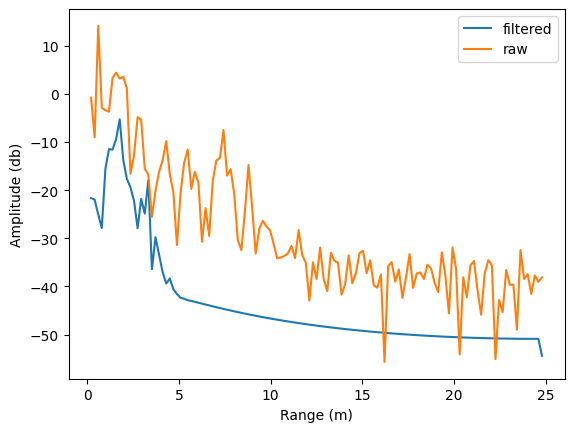

In [29]:
category='1person_v2'

index=1

path=f'{category}/{category}-{index}.mat'
f=data_process.data(path)
frame = copy.deepcopy(f)
def blackman(signal_):
        # reduce side lobes
    return np.convolve(signal_, signal.windows.blackmanharris(35), mode='same')
def simple_moving_average(signal, window=5):
    return np.convolve(signal, np.ones(window)/window, mode='same')
for i in range(frame.shape[0]):
    for j in range(frame.shape[1]):
        frame[i,j] = blackman(frame[i,j])
        #frame[i,j] = simple_moving_average(frame[i,j],3)
    
    cube_raw = mmwave.dsp.range_processing(f)
    cube = mmwave.dsp.range_processing(frame)
    #cube = (num_chirps_per_frame, num_rx_antennas, num_range_bins)
    
    
    #static clutter removal
    mean = cube.mean(0) #mean for each chirp
    cube = cube - mean

    mean_raw = cube_raw.mean(0) #mean for each chirp
    cube_raw = cube_raw - mean
    
    

    
    
    
    
    
    cube_filtered = np.empty((cube.shape[0],cube.shape[1],127),dtype=np.complex_)
    cube_raw_=np.empty((cube_raw.shape[0],cube_raw.shape[1],127),dtype=np.complex_)
    for i in range(cube.shape[0]):
        for j in range(cube.shape[1]):
            freq = fftpack.fftfreq(len(cube[i,j,:])) * 10000
            cube_filtered[i,j,:] = cube[i,j,:][freq > 0]
            cube_raw_[i,j,:] = cube_raw[i,j,:][freq > 0]
            #cube_filtered[i,j,:] = blackman(cube_filtered[i,j,:])
            cube_filtered[i,j,:] = simple_moving_average(cube_filtered[i,j,:],window=3)
            #cube[i,j,:] = gaussian_filter1d(cube[i,j,:],sigma=2)
freq = fftpack.fftfreq(len(cube_raw[0,0])) * 10000*1000
freq_=freq[freq>0]
dist= freq_*c/(2*S)
plt.plot(dist,20*np.log10(np.abs(cube_filtered[0,0])/2**15),label='filtered')
plt.plot(dist,20*np.log10(np.abs(cube_raw_[0,0])/2**15),label='raw')
plt.xlabel('Range (m)')
plt.ylabel('Amplitude (db)')
plt.legend()        

#### range-angle heatmap 

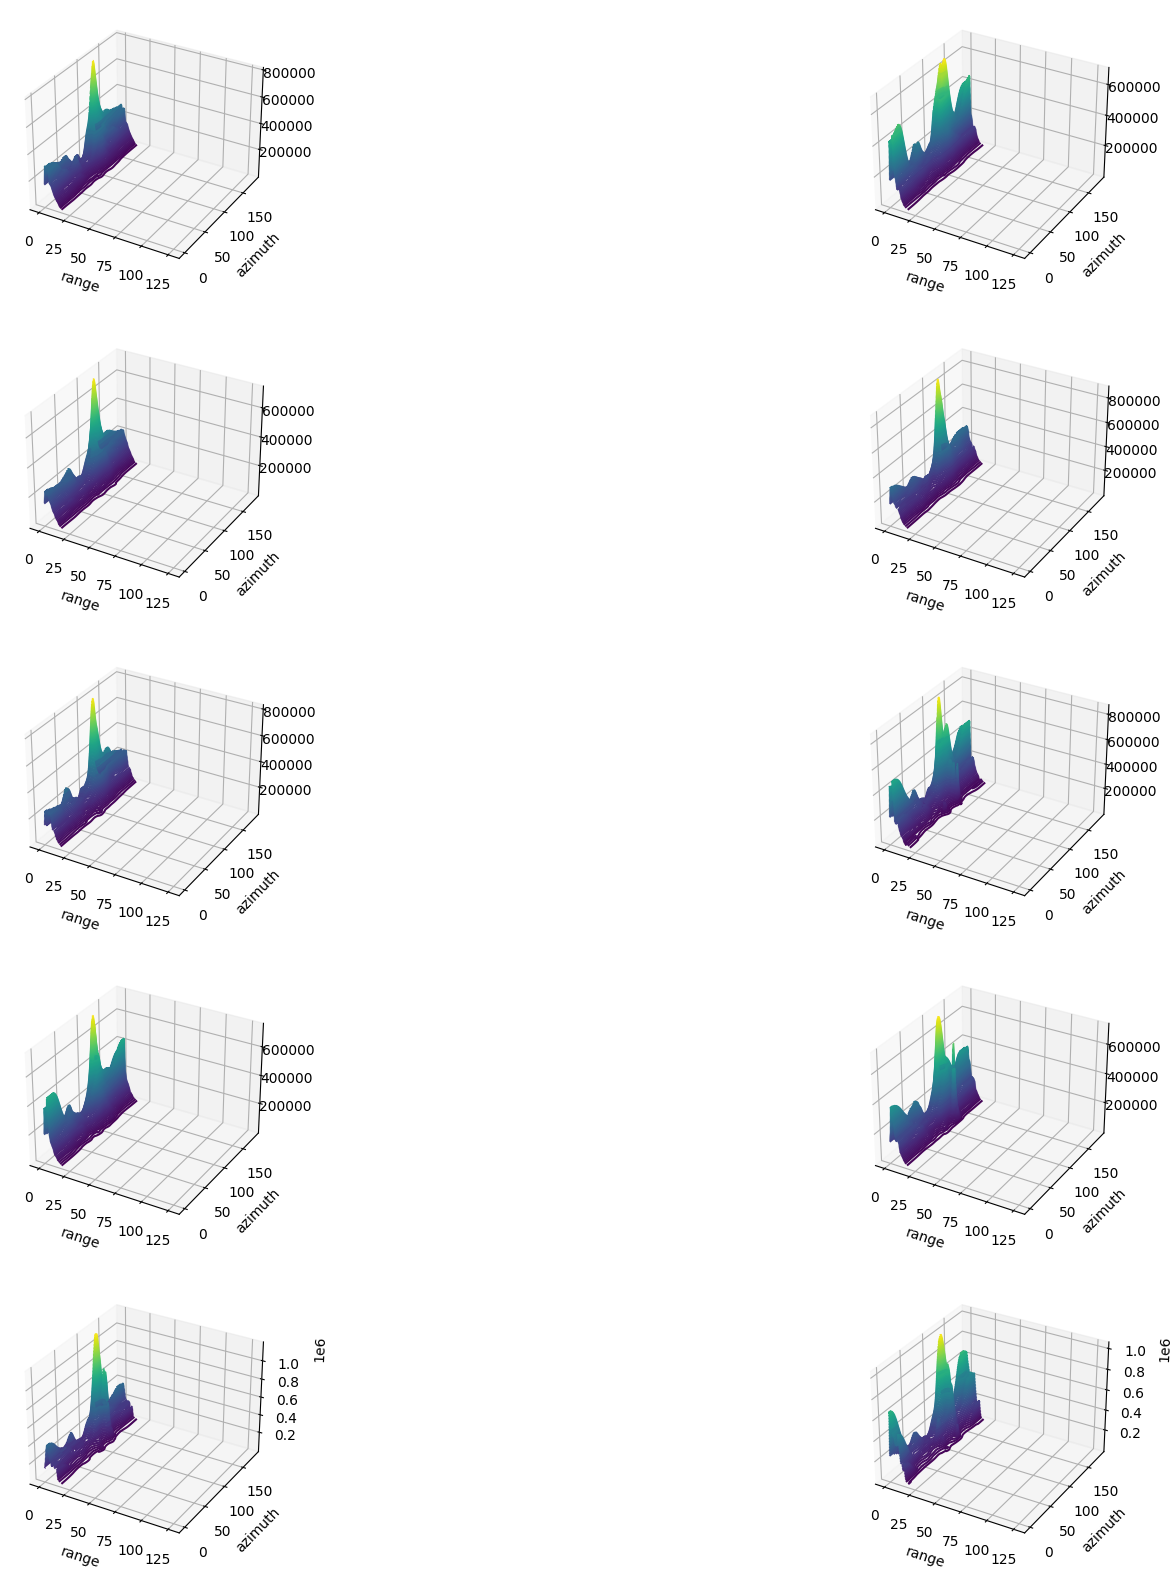

In [4]:
category='0person'
fig, axs = plt.subplots(5, 2,figsize=(20,20),subplot_kw=dict(projection='3d'))
index=1
for i in range(5):
    for j in range(2):
        path=f'{category}/{category}-{index}.mat'
        f=data_process.data(path)
        heatmap = analysis_utils.range_angle_heatmap(f)
        x = np.linspace(0,126,num=127)
        y = np.linspace(0,180,num=181)
        X,Y = np.meshgrid(x,y)
        #axs[i,j] = plt.axes(projection='3d')
        axs[i,j].contour(X, Y, heatmap,100)
        axs[i,j].set_xlabel('range')
        axs[i,j].set_ylabel('azimuth')
        
        #axs[i,j].set_title('Range-Azimuth heatmap')
        index+=1
plt.show()
        

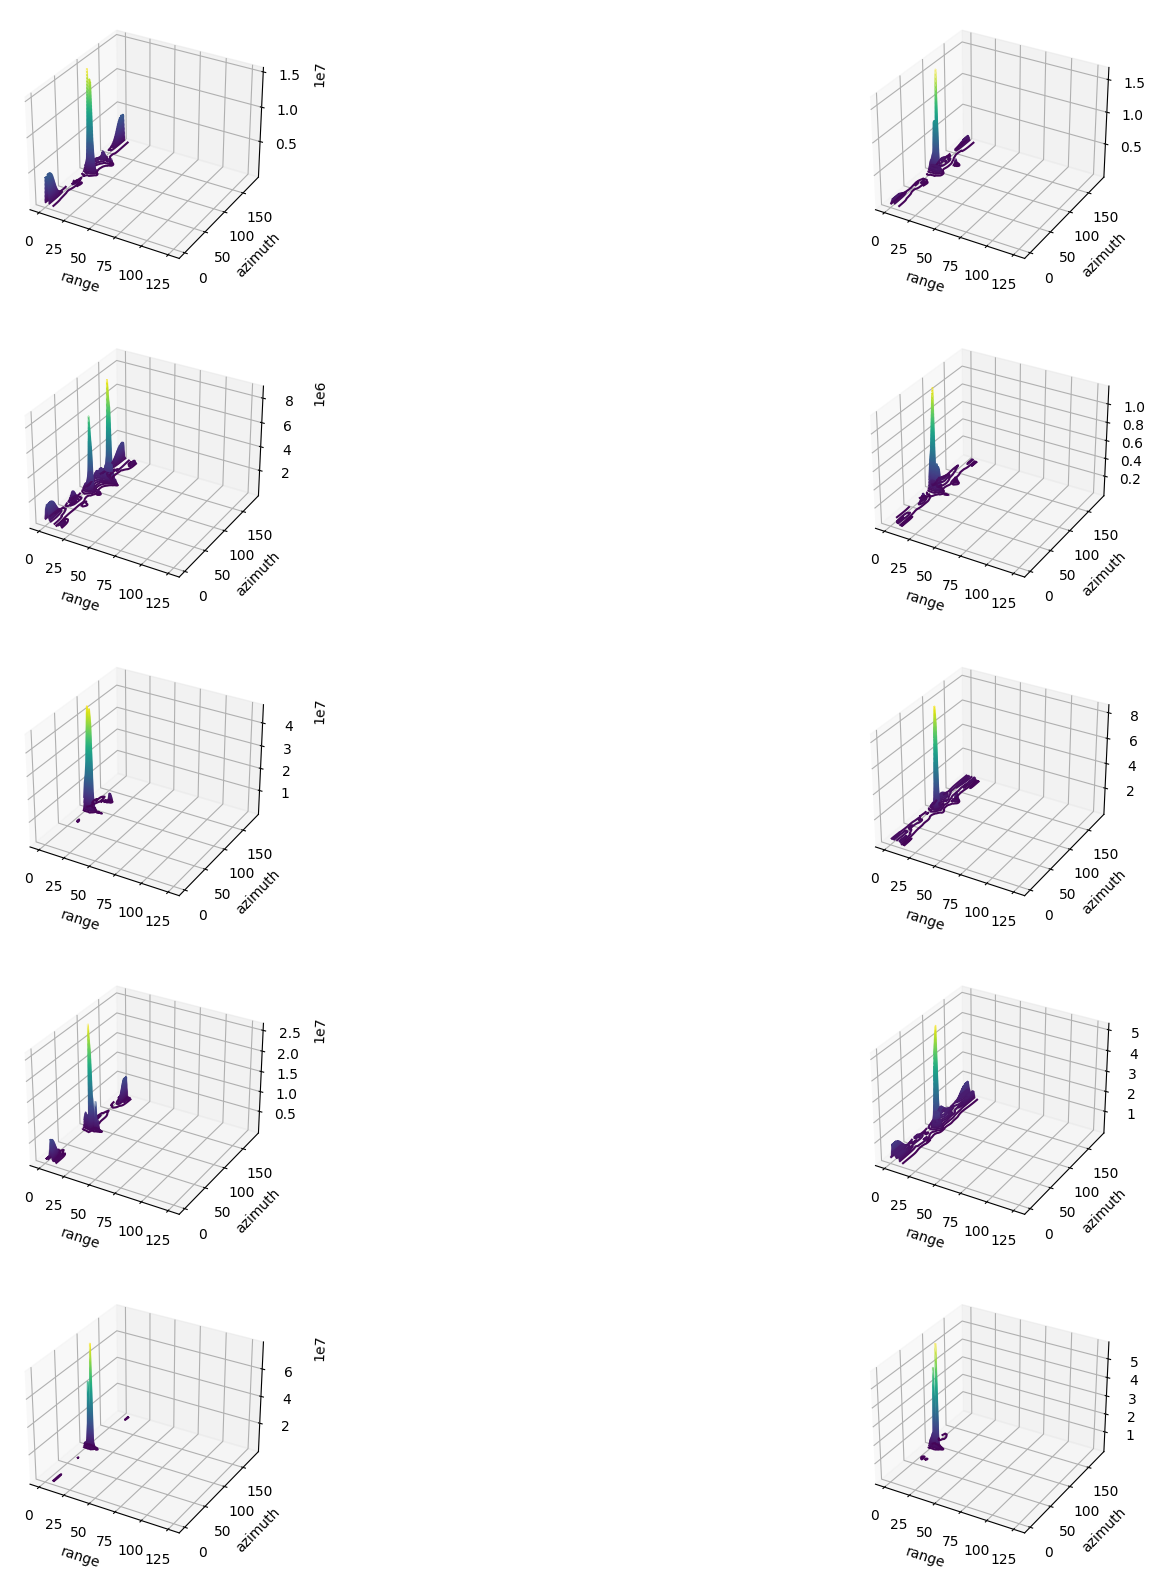

In [5]:
category='1person_v2'
fig, axs = plt.subplots(5, 2,figsize=(20,20),subplot_kw=dict(projection='3d'))
index=1
for i in range(5):
    for j in range(2):
        path=f'{category}/{category}-{index}.mat'
        f=data_process.data(path)
        heatmap = analysis_utils.range_angle_heatmap(f)
        x = np.linspace(0,126,num=127)
        y = np.linspace(0,180,num=181)
        X,Y = np.meshgrid(x,y)
        #axs[i,j] = plt.axes(projection='3d')
        axs[i,j].contour(X, Y, heatmap,100)
        axs[i,j].set_xlabel('range')
        axs[i,j].set_ylabel('azimuth')
        
        #axs[i,j].set_title('Range-Azimuth heatmap')
        index+=1
plt.show()
        

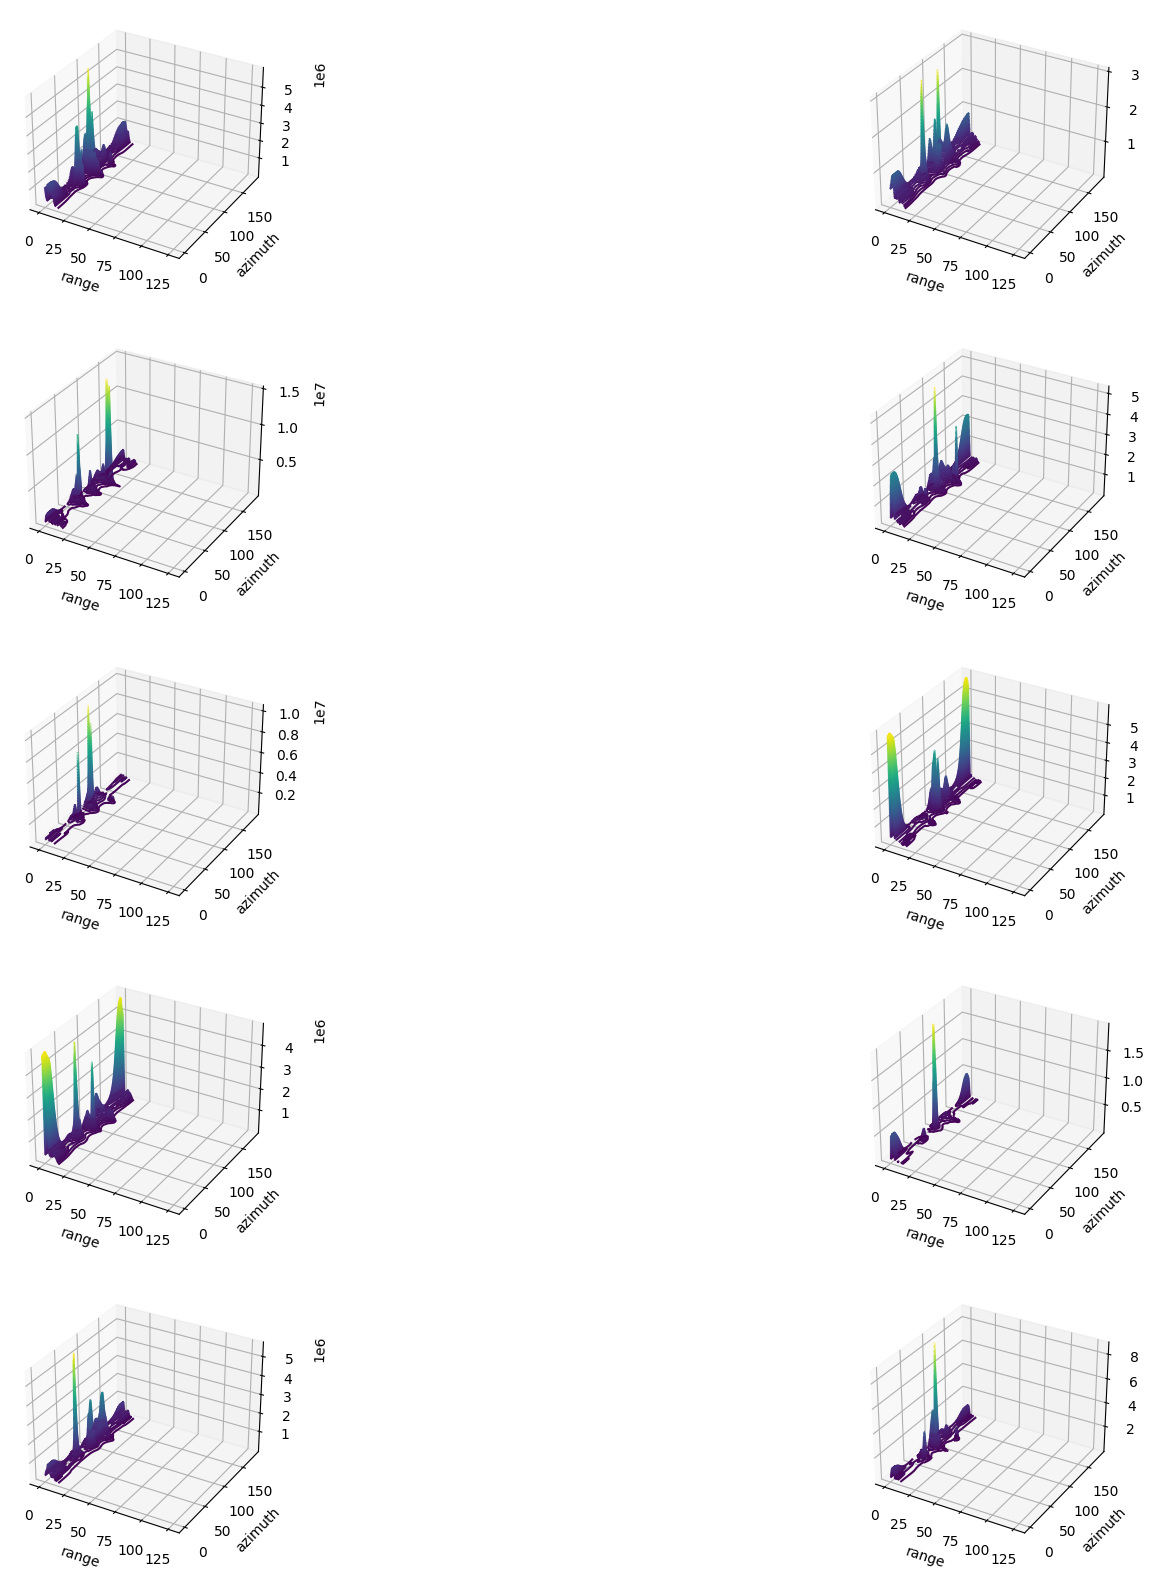

In [6]:
category='2person_v2'
fig, axs = plt.subplots(5, 2,figsize=(20,20),subplot_kw=dict(projection='3d'))
index=1
for i in range(5):
    for j in range(2):
        path=f'{category}/{category}-{index}.mat'
        f=data_process.data(path)
        heatmap = analysis_utils.range_angle_heatmap(f)
        x = np.linspace(0,126,num=127)
        y = np.linspace(0,180,num=181)
        X,Y = np.meshgrid(x,y)
        #axs[i,j] = plt.axes(projection='3d')
        axs[i,j].contour(X, Y, heatmap,100)
        axs[i,j].set_xlabel('range')
        axs[i,j].set_ylabel('azimuth')
        
        #axs[i,j].set_title('Range-Azimuth heatmap')
        index+=1
plt.show()
        

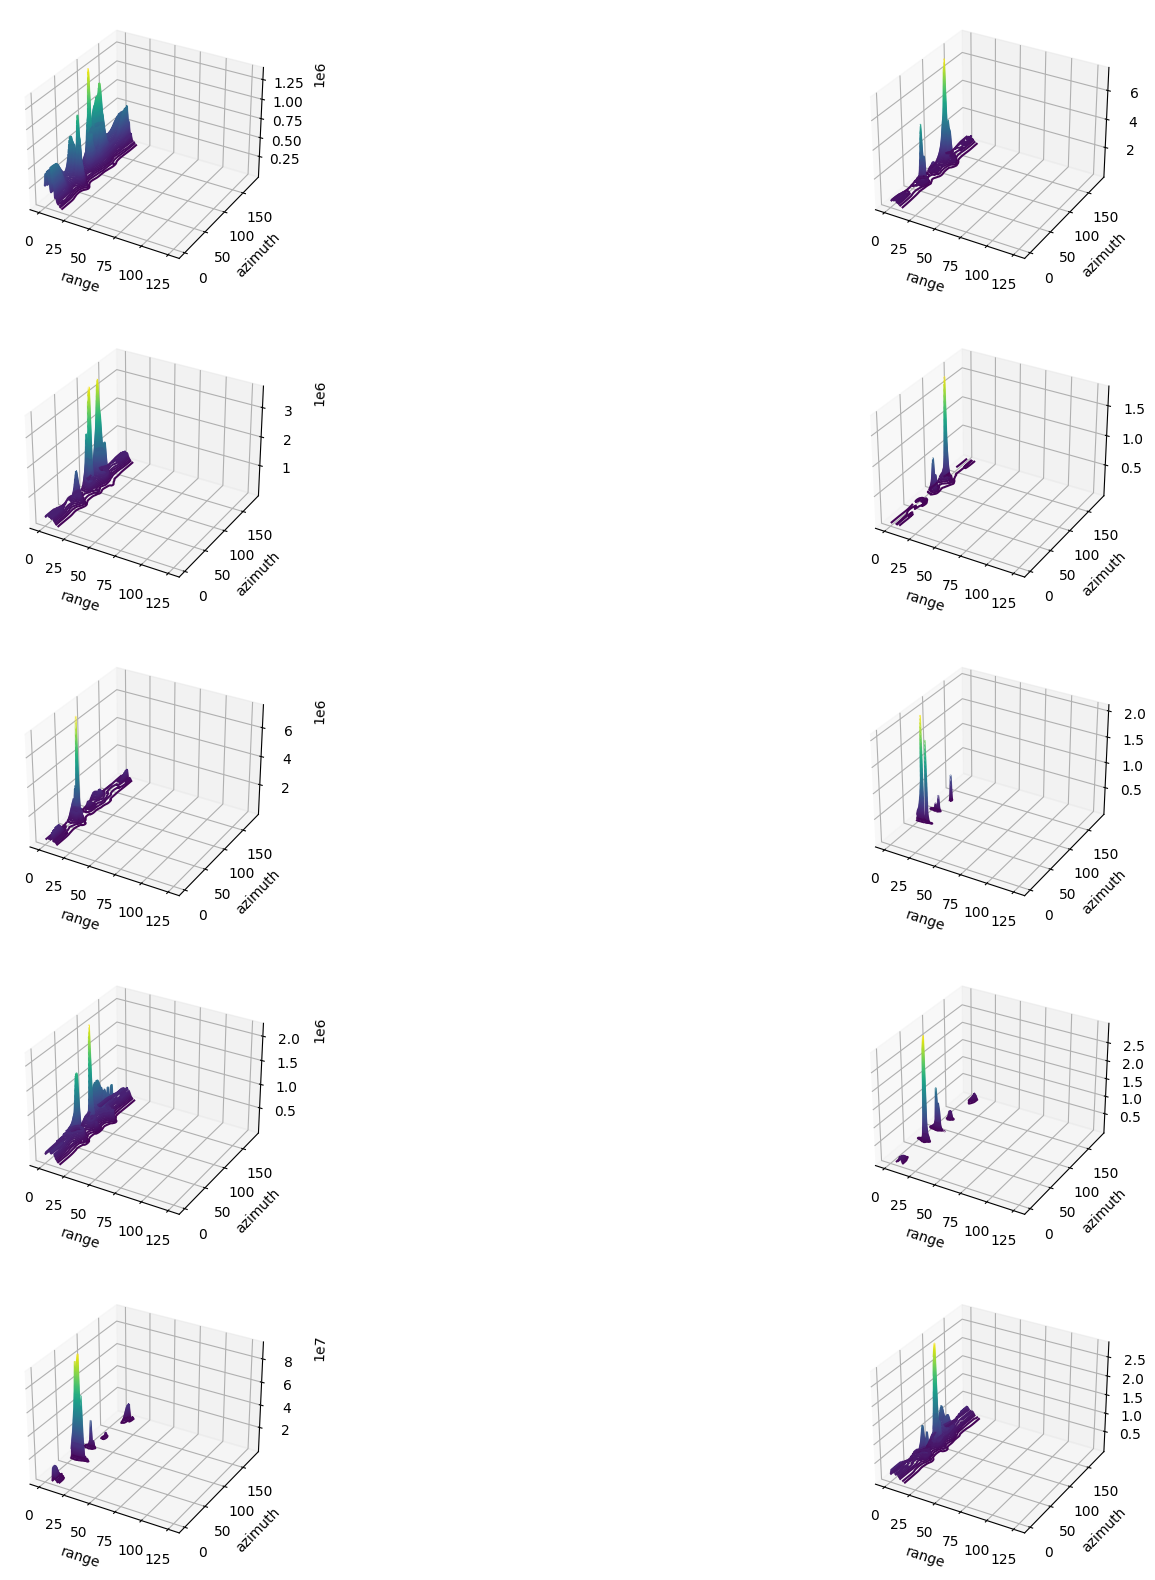

In [7]:
category='3person'
fig, axs = plt.subplots(5, 2,figsize=(20,20),subplot_kw=dict(projection='3d'))
index=1
for i in range(5):
    for j in range(2):
        path=f'{category}/{category}-{index}.mat'
        f=data_process.data(path)
        heatmap = analysis_utils.range_angle_heatmap(f)
        x = np.linspace(0,126,num=127)
        y = np.linspace(0,180,num=181)
        X,Y = np.meshgrid(x,y)
        #axs[i,j] = plt.axes(projection='3d')
        axs[i,j].contour(X, Y, heatmap,100)
        axs[i,j].set_xlabel('range')
        axs[i,j].set_ylabel('azimuth')
        
        #axs[i,j].set_title('Range-Azimuth heatmap')
        index+=1
plt.show()
        

#### People Counting Result

In [37]:
def dbscan(category):
    res=[]
    for i in range(1,11):
        
        path=f'{category}/{category}-{i}.mat'
        f=data_process.data(path)

        heatmap = analysis_utils.range_angle_heatmap(f)

        #heatmap = np.log2(heatmap)
        ranges,angles,pairs = analysis_utils.peak_finding_cfar(
                    heatmap=heatmap, l_bound = np.mean(heatmap)+2*np.std(heatmap),
                    guard_len=6, noise_len=12,scale_a=3.15,scale_r=3)

        size = []
        heatmap = (heatmap-np.min(heatmap))/(np.max(heatmap) - np.min(heatmap))
        for p in pairs:
            size.append(int(heatmap[p[0]][p[1]]*10)+1)

        coords = analysis_utils.coord(ranges,angles)

        dots = []
        
        for i in range(len(coords)):
            #if size[i]>np.quantile(size,0.8):
            for j in range(size[i]):
                dots.append(list(coords[i]))
        #print('Predicted Number of people:')
        if len(dots)>0:
            #print(np.quantile(size,0.9))
            cl = DBSCAN(0.2,min_samples=min(np.quantile(size,0.95)*2,20)).fit(dots)
            if np.max(cl.labels_)==-1:
                print('Predicted Number of people: 0')
                res.append(0)
            else:
                print(f'Predicted Number of people: {np.max(cl.labels_)+1}')
                res.append(np.max(cl.labels_)+1)
        else:
            print('Predicted Number of people: 0')
            res.append(0)
    #print(res)
        


In [38]:
dbscan('0person')

Predicted Number of people: 0
Predicted Number of people: 0
Predicted Number of people: 0
Predicted Number of people: 0
Predicted Number of people: 0
Predicted Number of people: 0
Predicted Number of people: 0
Predicted Number of people: 1
Predicted Number of people: 1
Predicted Number of people: 1


In [39]:
dbscan('1person_v2')

Predicted Number of people: 2
Predicted Number of people: 1
Predicted Number of people: 2
Predicted Number of people: 1
Predicted Number of people: 1
Predicted Number of people: 1
Predicted Number of people: 2
Predicted Number of people: 1
Predicted Number of people: 1
Predicted Number of people: 2


In [40]:
dbscan('2person_v2')

Predicted Number of people: 3
Predicted Number of people: 3
Predicted Number of people: 3
Predicted Number of people: 1
Predicted Number of people: 2
Predicted Number of people: 1
Predicted Number of people: 2
Predicted Number of people: 2
Predicted Number of people: 2
Predicted Number of people: 4


In [41]:
dbscan('3person')

Predicted Number of people: 3
Predicted Number of people: 3
Predicted Number of people: 3
Predicted Number of people: 2
Predicted Number of people: 2
Predicted Number of people: 6
Predicted Number of people: 3
Predicted Number of people: 3
Predicted Number of people: 3
Predicted Number of people: 3


#### Position Approximation for 1 person

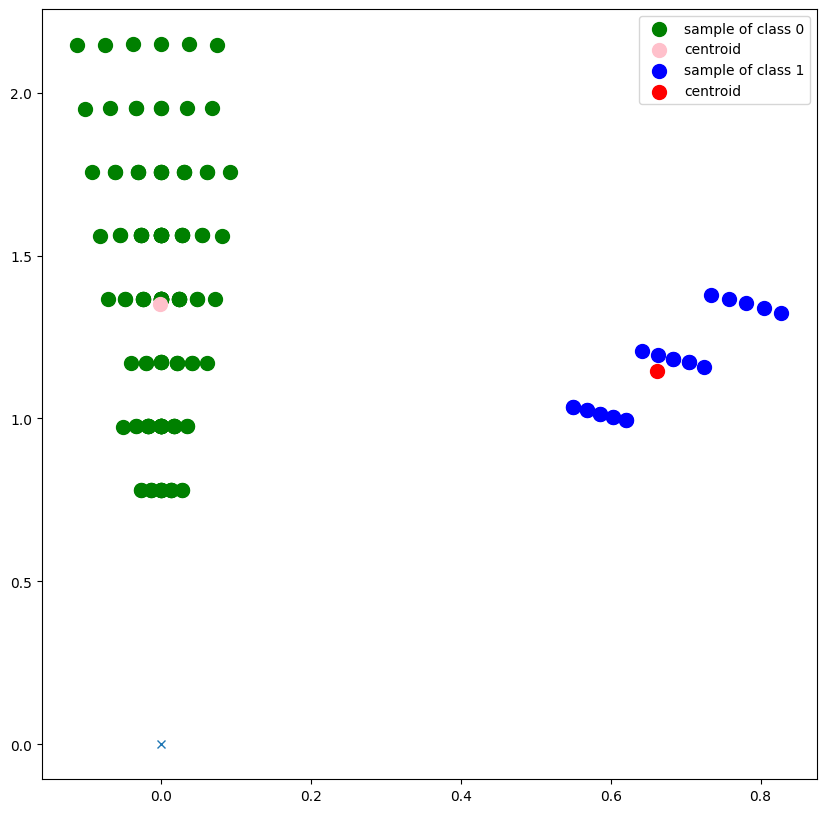

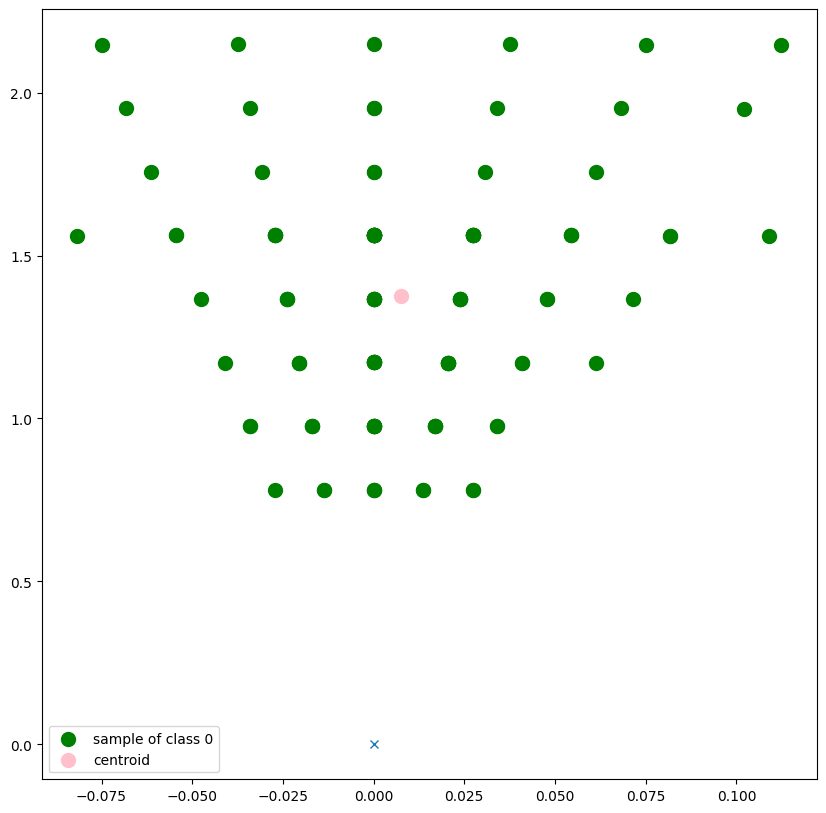

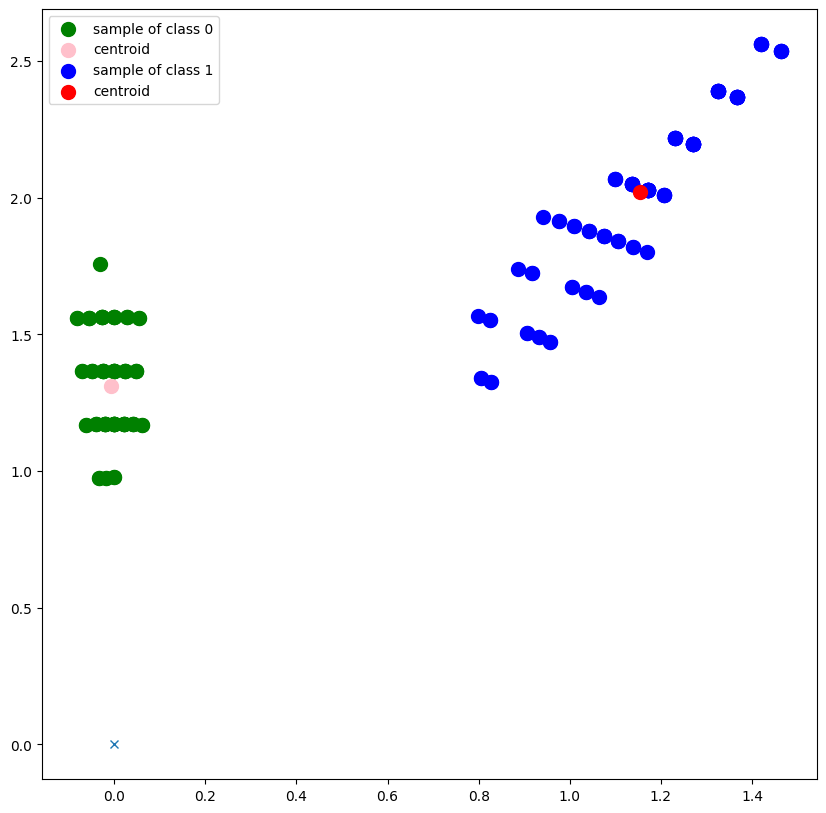

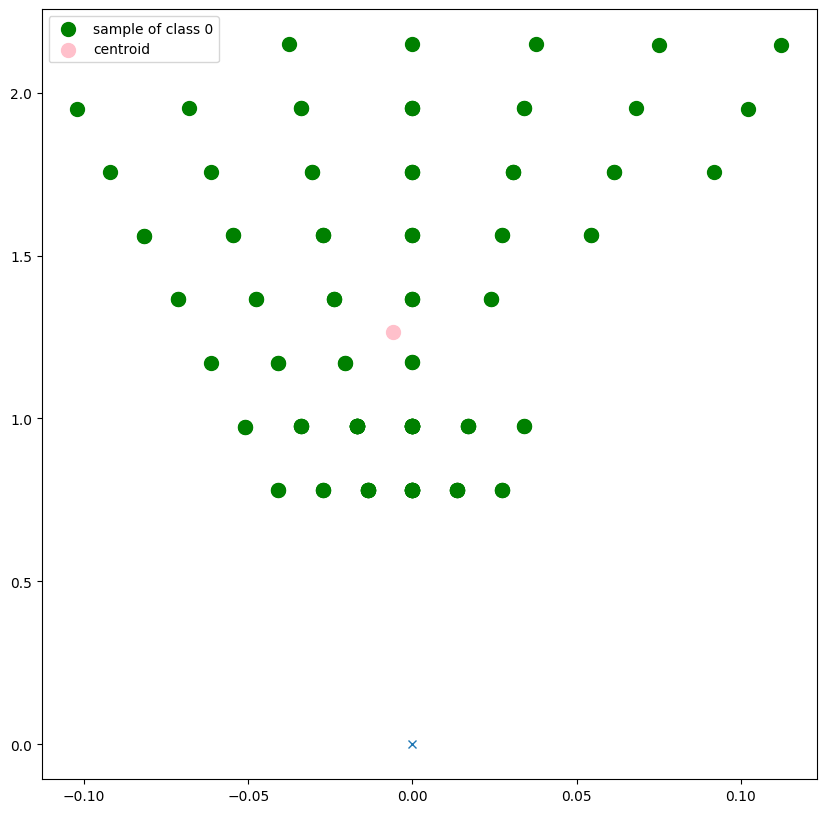

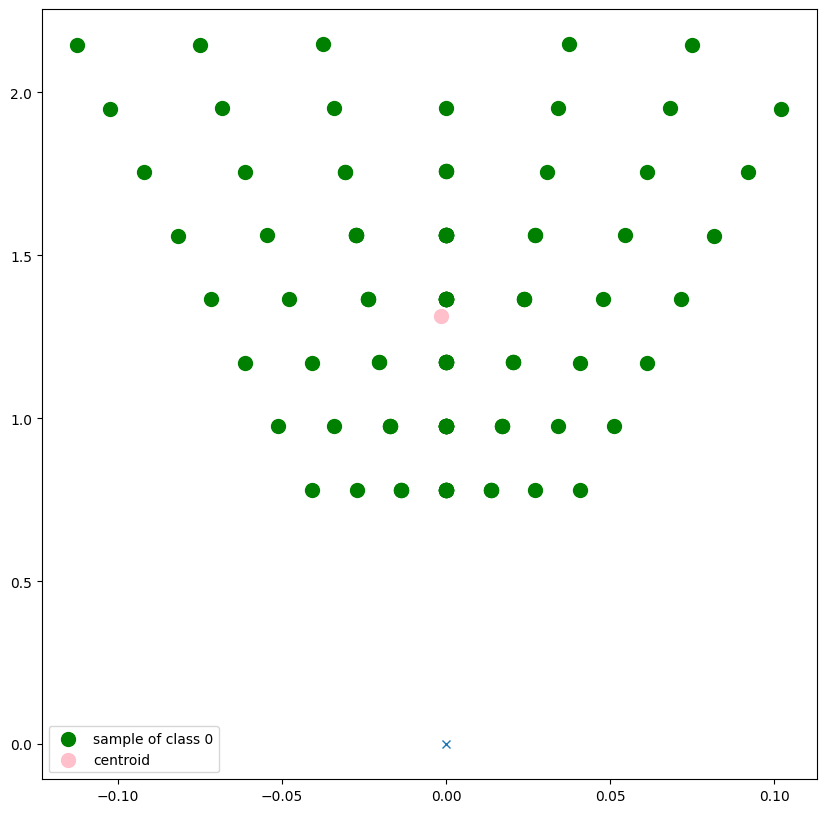

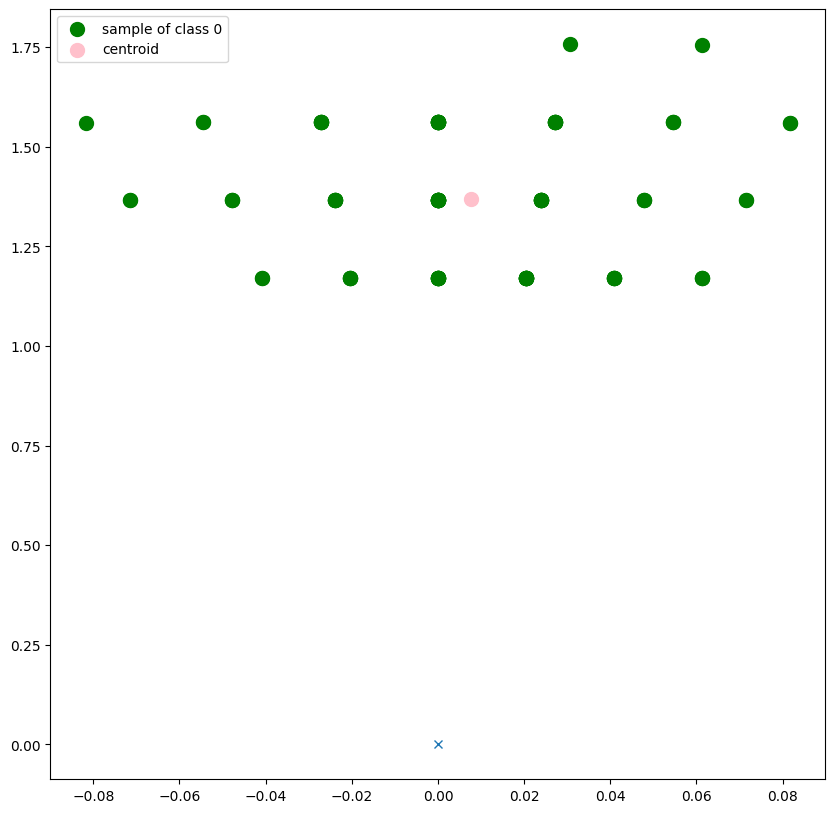

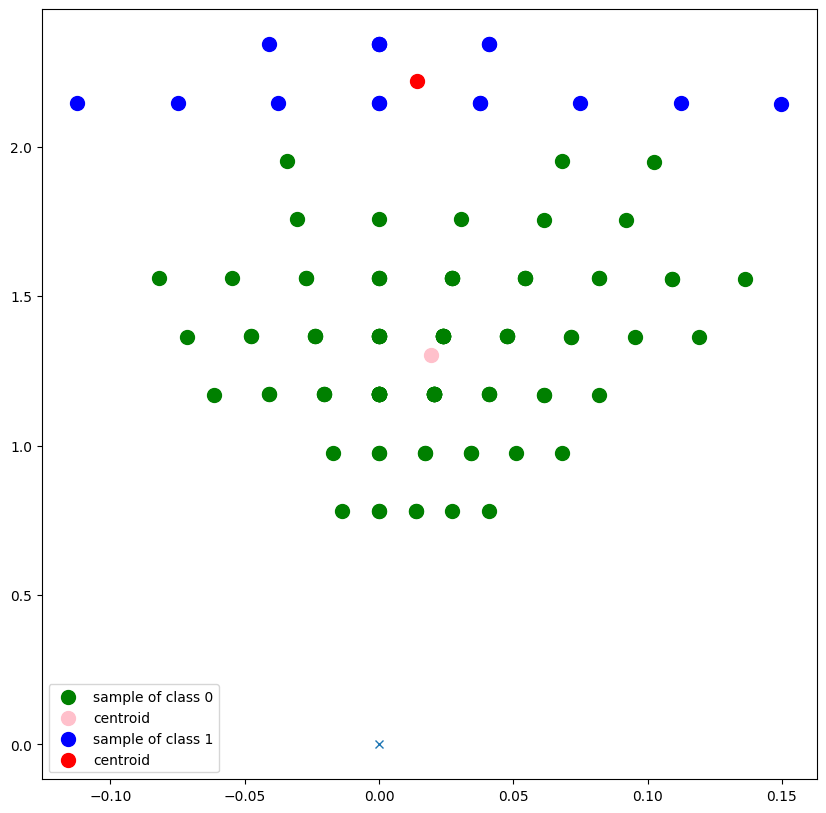

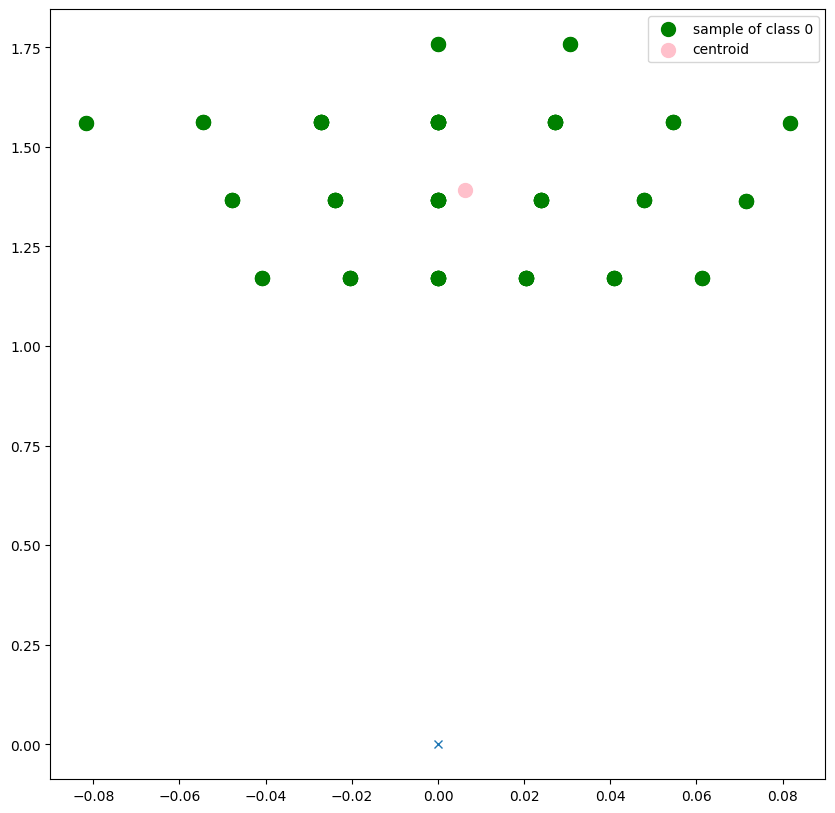

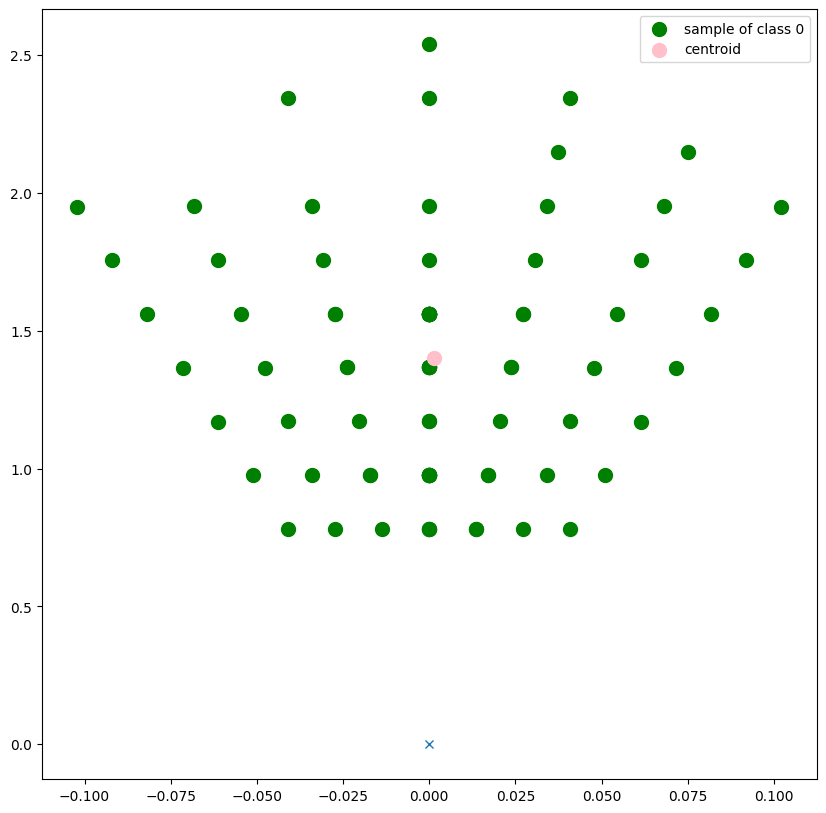

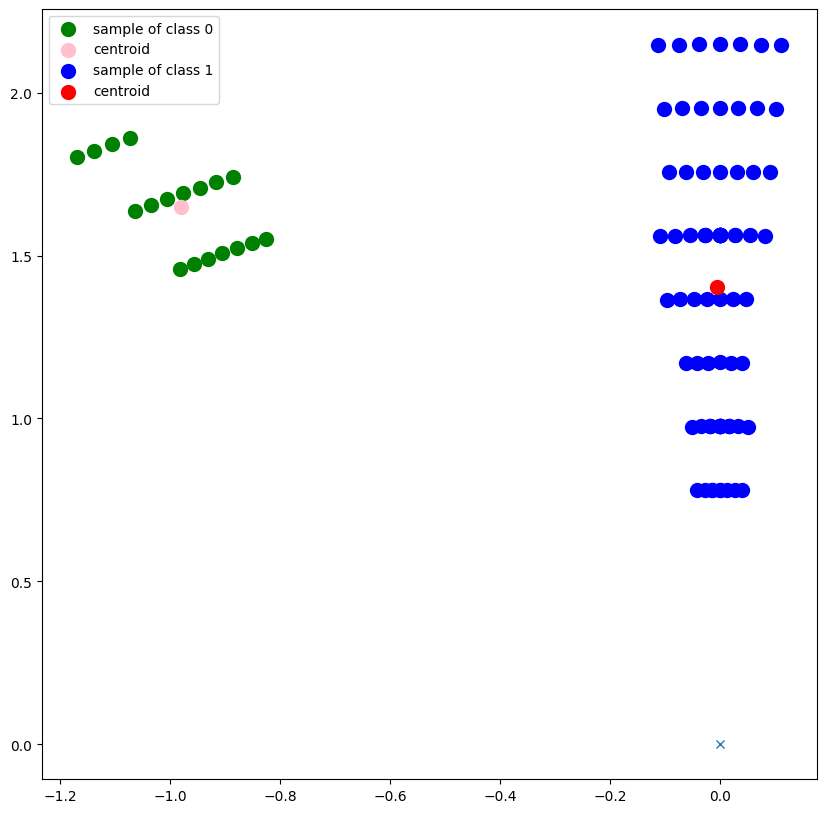

In [32]:
def dbscan(category):
    for k in range(1,11):
        path=f'{category}/{category}-{k}.mat'
        f=data_process.data(path)

        heatmap = analysis_utils.range_angle_heatmap(f)

        #heatmap = np.log2(heatmap)
        ranges,angles,pairs = analysis_utils.peak_finding_cfar(
                    heatmap=heatmap, l_bound = np.mean(heatmap)+2*np.std(heatmap),
                    guard_len=6, noise_len=12,scale_a=3.15,scale_r=3)

        size = []
        heatmap = (heatmap-np.min(heatmap))/(np.max(heatmap) - np.min(heatmap))
        for p in pairs:
            size.append(int(heatmap[p[0]][p[1]]*10)+1)

        coords = analysis_utils.coord(ranges,angles)

        dots = []
        #print(size)
        for i in range(len(coords)):
            #if size[i]>np.quantile(size,0.8):
            for j in range(size[i]):
                dots.append(list(coords[i]))

        one = []
        zero = []
        ignore = []
        if len(dots) > 0:
            fig, axs = plt.subplots(1,1,figsize=(10,10))
            cl = DBSCAN(0.2,min_samples=int(min(np.quantile(size,0.95)*2,20))).fit(dots)
            #print(cl.labels_)
            for i in range(len(dots)):
                if cl.labels_[i] == -1:
                    #dots[i] = np.nan
                    ignore.append(dots[i])
                elif cl.labels_[i] == 0:
                    zero.append(dots[i])
                elif cl.labels_[i] == 1:
                    one.append(dots[i])
            #print(zero)
            #print(one)
            dots = np.array(dots)
            zero = np.array(zero)
            one = np.array(one)
            if one.size != 0:
                mean1x = np.mean(one[:,0])
                mean1y = np.mean(one[:,1])
            if zero.size != 0:
                mean0x = np.mean(zero[:,0])
                mean0y = np.mean(zero[:,1])
            
            if zero.size != 0: 
                plt.scatter(zero[:,0],zero[:,1], color = 'green', label = 'sample of class 0',s=100)
                plt.scatter(mean0x,mean0y, color = 'pink', label = 'centroid',s=100)
            if one.size != 0: 
                plt.scatter(one[:,0],one[:,1], color = 'blue', label = 'sample of class 1',s=100)
                plt.scatter(mean1x,mean1y, color = 'red', label = 'centroid',s=100)
            plt.plot([0],[0],marker='x')
            plt.legend()
            

            
        
dbscan('1person_v2')
plt.show()


#### Reference

[1]: Pan, E., Tang, J., Kosaka, D., Yao, R., & Gupta, A. (2019). OpenRadar. GitHub Repository. Retrieved from https://github.com/presenseradar/openradar